In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 120,
    "figure.figsize": (10, 6)
})

Load data

In [2]:
data_path = "data.csv"
df = pd.read_csv(data_path)

# Force parse CreateDate with timezone awareness (UTC)
df["CreateDate"] = pd.to_datetime(df["CreateDate"], errors="coerce", utc=True)

# Drop rows with invalid dates (if any)
df = df.dropna(subset=["CreateDate"]).reset_index(drop=True)

Class and Monthly split (Classess are Biased, Calling_Out, Others).
It has to be said that these 3 classess does not reflect in any way hate speech.

In [3]:

def assign_class_simple(row):
    if row.get("Biased") == 1:
        return "Biased"
    if row.get("Calling_Out") == 1:
        return "Calling_Out"
    return "Others"

df["class"] = df.apply(assign_class_simple, axis=1)

# Create year_month column
df["year_month"] = df["CreateDate"].dt.to_period("M").astype(str)

# Some rows are duplicated due to multiple target groups, we keep only one random instance
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df.drop_duplicates(subset="TweetID", keep="first").copy()

# Quick check
print("Class counts:")
print(df["class"].value_counts())

Class counts:
Others         6275
Calling_Out    1820
Biased          503
Name: class, dtype: int64


c:\Users\Dario\miniconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Overall percentage per class

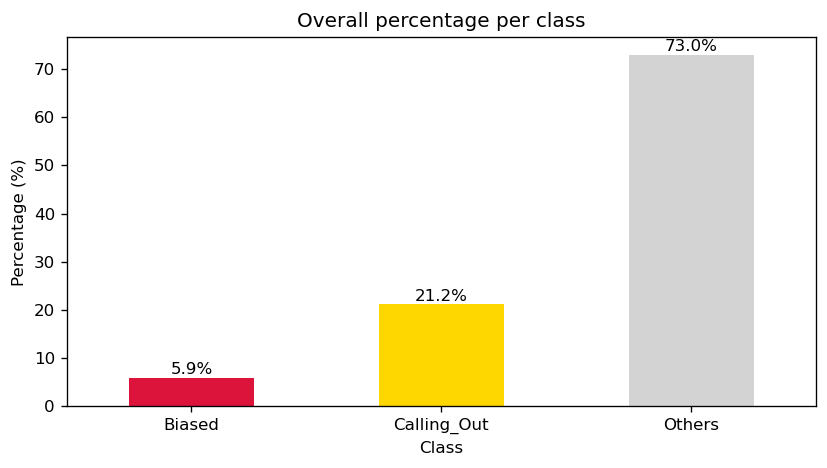

In [4]:
class_colors = {"Biased": "crimson", "Calling_Out": "gold", "Others": "lightgray"}
class_percent = df["class"].value_counts(normalize=True).reindex(["Biased", "Calling_Out", "Others"]).fillna(0) * 100

plt.figure(figsize=(7, 4))
class_percent.plot(kind="bar", color=[class_colors[k] for k in class_percent.index])

plt.title("Overall percentage per class")
plt.ylabel("Percentage (%)")
plt.xlabel("Class")
plt.xticks(rotation=0)

for i, v in enumerate(class_percent):
    plt.text(i, v + 0.8, f"{v:.1f}%", ha="center")

plt.tight_layout()
plt.show()


Montthly distribution of classes

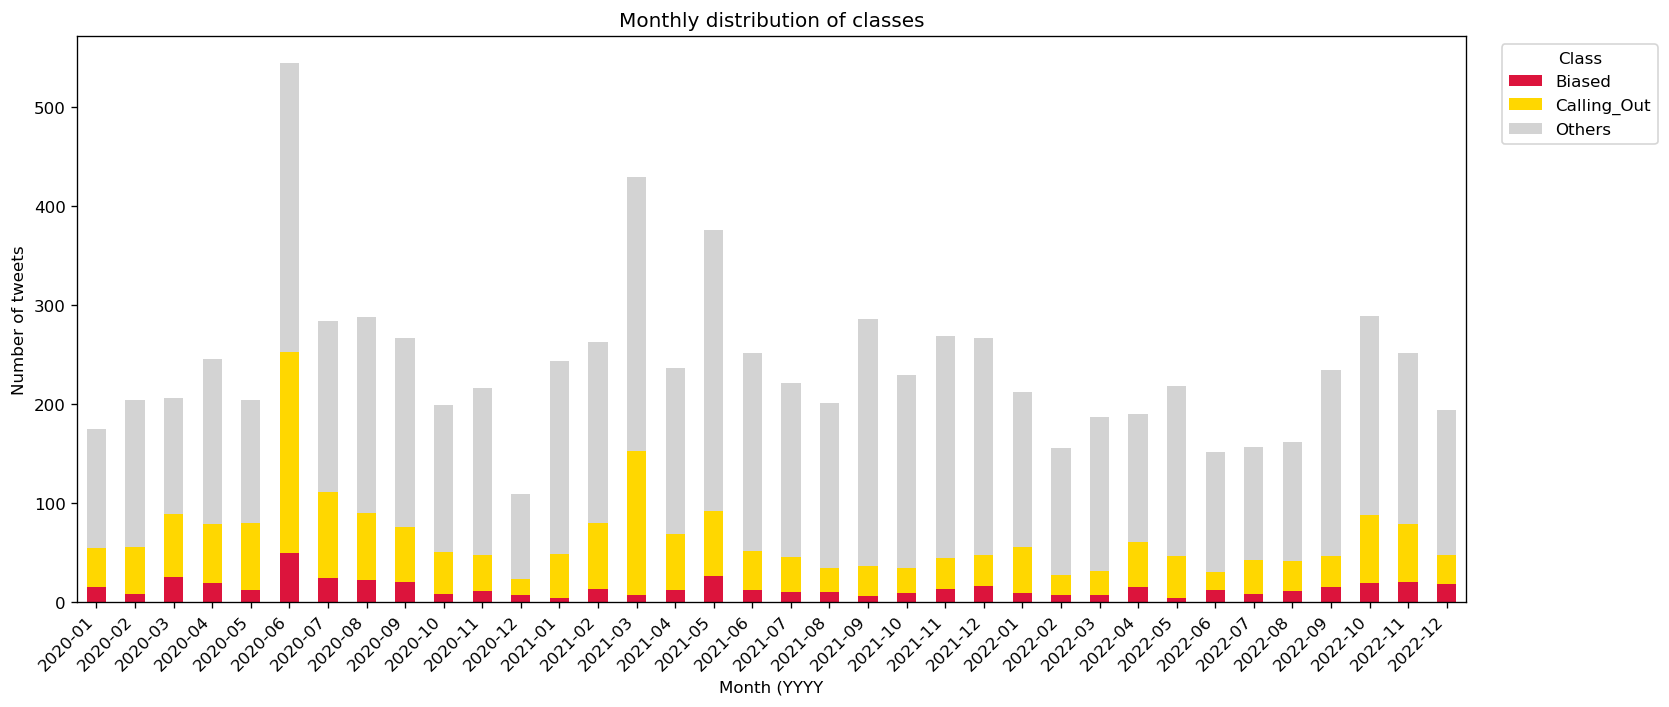

In [5]:
monthly_counts = df.groupby(["year_month", "class"]).size().unstack(fill_value=0).sort_index()
monthly_counts.plot(kind="bar", stacked=True, figsize=(14, 6), color=[class_colors.get(c) for c in monthly_counts.columns])

plt.title("Monthly distribution of classes")
plt.xlabel("Month (YYYY")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

Montthly distribution per classes

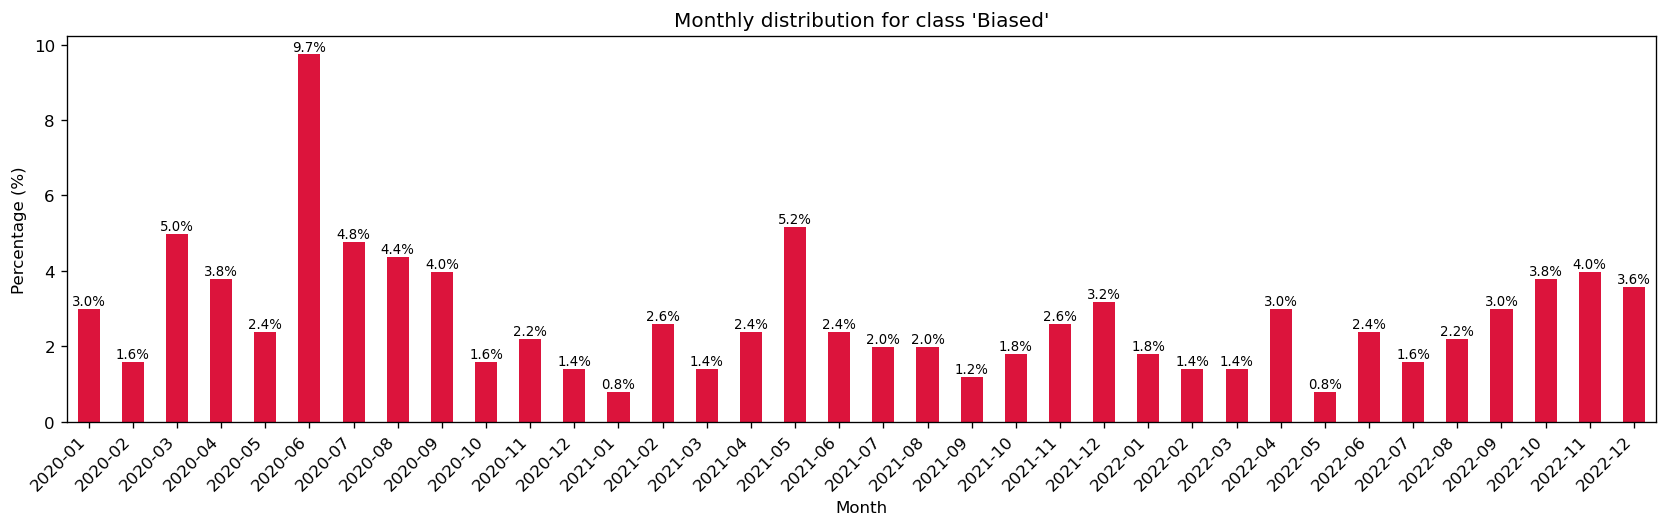

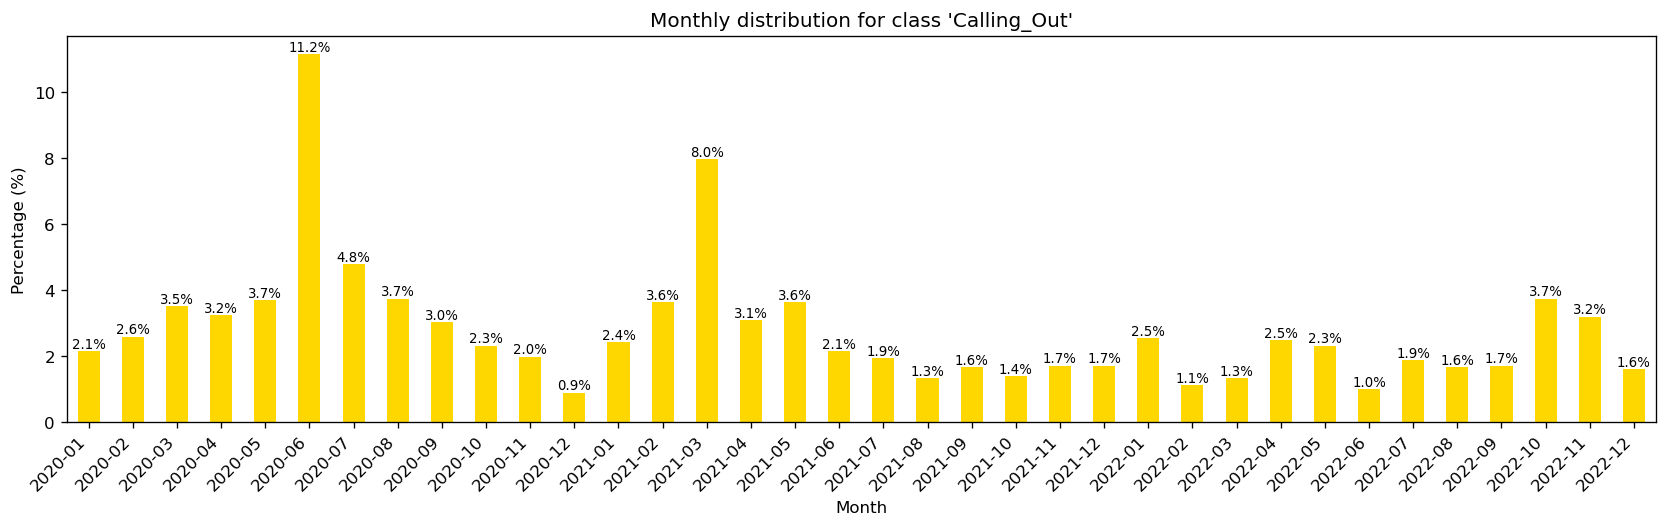

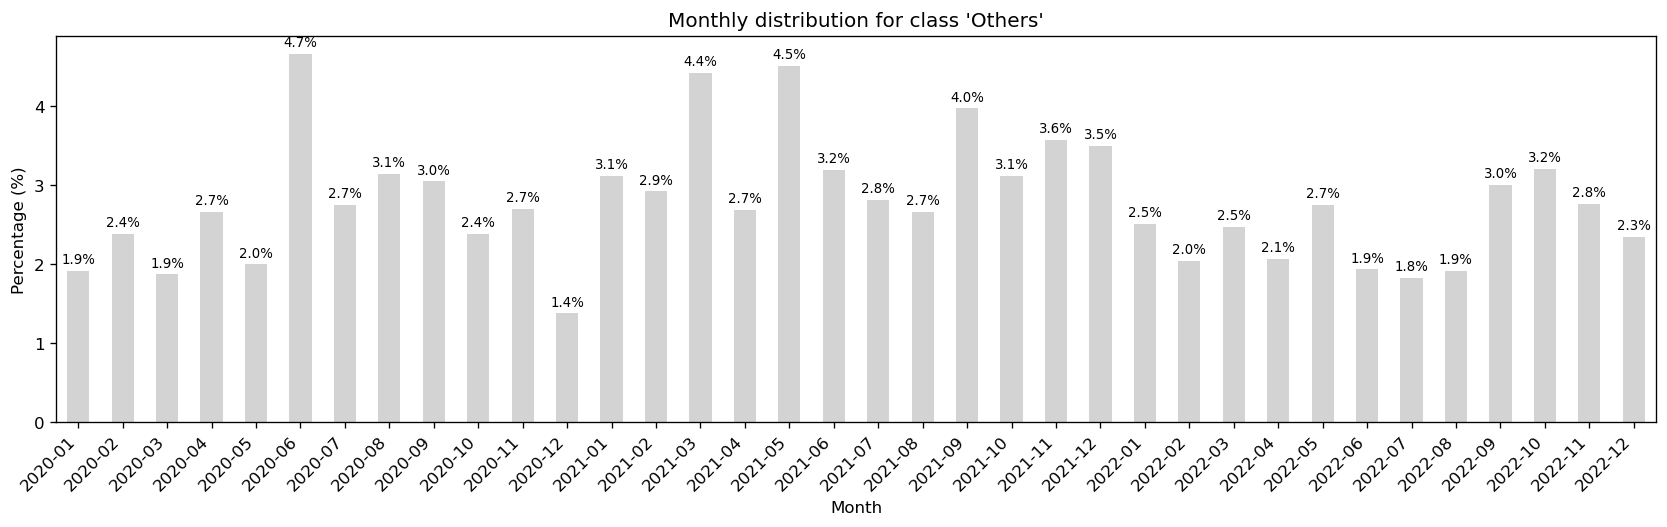

In [6]:
for cls in ["Biased", "Calling_Out", "Others"]:
    # filter rows of that class
    df_cls = df[df["class"] == cls]

    counts_per_month = df_cls.groupby("year_month").size().sort_index()
    percent_per_month = counts_per_month / counts_per_month.sum() * 100

    plt.figure(figsize=(14, 4.5))
    percent_per_month.plot(kind="bar", color=class_colors[cls])
    plt.title(f"Monthly distribution for class '{cls}'")
    plt.xlabel("Month")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45, ha="right")

    for i, val in enumerate(percent_per_month):
        plt.text(i, val + 0.1, f"{val:.1f}%", ha="center", fontsize=8)

    plt.tight_layout()
    plt.show()


Monthly distribution of dataset

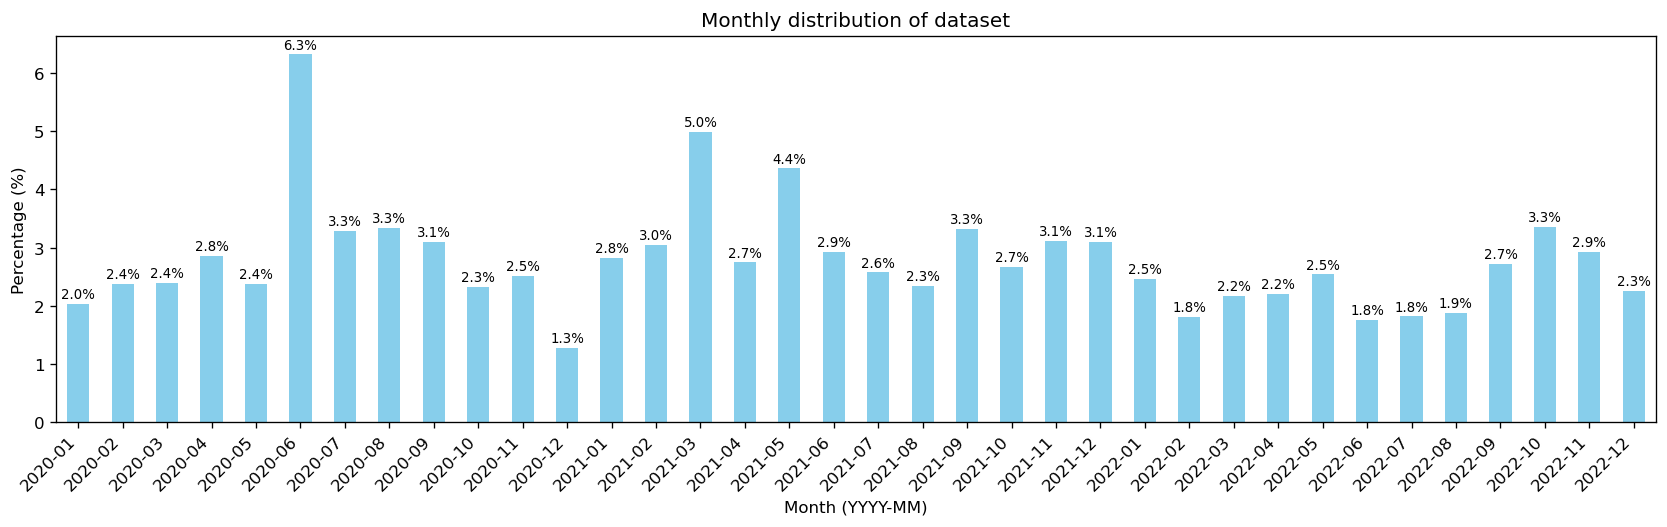

In [7]:
monthly_totals = monthly_counts.sum(axis=1)
monthly_percent_all = monthly_totals / monthly_totals.sum() * 100

plt.figure(figsize=(14, 4.5))
monthly_percent_all.plot(kind="bar", color="skyblue")
plt.title("Monthly distribution of dataset")
plt.xlabel("Month (YYYY-MM)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")

for i, val in enumerate(monthly_percent_all):
    plt.text(i, val+0.1, f"{val:.1f}%", ha="center", fontsize=8)

plt.tight_layout()
plt.show()


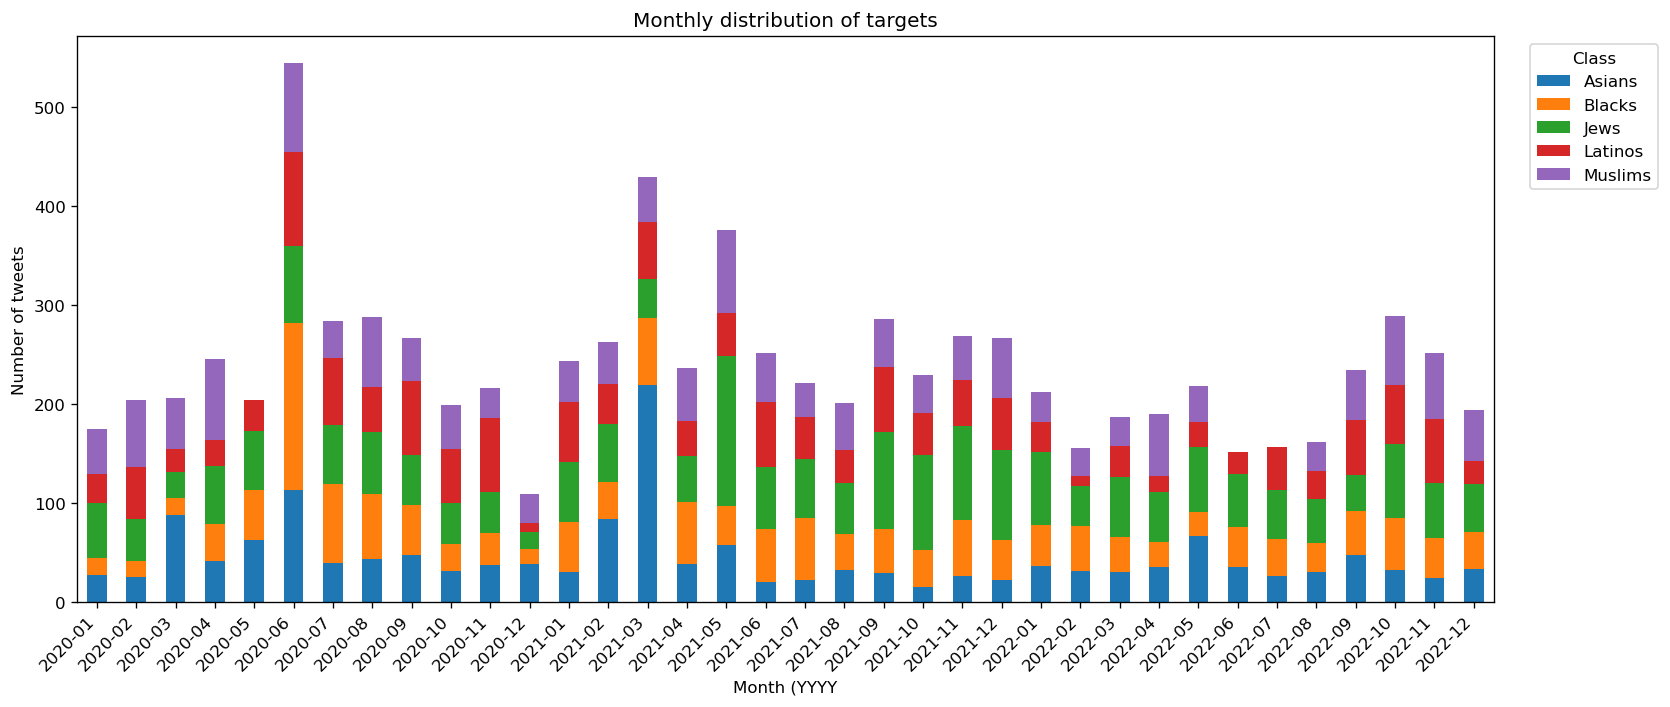

In [8]:
monthly_counts = df.groupby(["year_month", "Keyword"]).size().unstack(fill_value=0).sort_index()
monthly_counts.plot(kind="bar", stacked=True, figsize=(14, 6))

plt.title("Monthly distribution of targets")
plt.xlabel("Month (YYYY")
plt.ylabel("Number of tweets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()